**Ume Taqadus**

**22p-9393(A)**

**Assignment 3**

In [90]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

In [41]:
df=pd.read_csv("air_quality_data.csv")
print(df.head())
print(df.info())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 

**1. Data Cleaning**

1. Identify Issues:



In [42]:
# Identify missing values
missing_values = df.isna().sum()
print("Missing values:\n", missing_values[missing_values > 0])  # Show only columns with missing values

# Find outliers using Z-score
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
z_scores = df[columns].apply(stats.zscore)  # Calculate Z-scores
outliers = (z_scores.abs() > 3).sum()  # Count outliers in each column
print("\nOutliers in each column:\n", outliers)

# Identify negative pollutant values
negative_values = (df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] < 0).sum()
print("\nNegative Values:\n", negative_values)

# Identify unrealistic temperature values (below -50°C)
unrealistic_temps = df[df['TEMP'] < -50]
print("\nUnrealistic Temperatures Found:", len(unrealistic_temps))

# Identify unrealistic pressure values (below 500 hPa)
unrealistic_pressures = df[df['PRES'] < 500]
print("\nUnrealistic Pressures Found:", len(unrealistic_pressures))

Missing values:
 PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

Outliers in each column:
 PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Negative Values:
 PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64

Unrealistic Temperatures Found: 0

Unrealistic Pressures Found: 0


2. Handle Missing Values and Outliers:

In [55]:
# use median
pollutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
df[pollutant]=df[pollutant].fillna(df[pollutant].median())

#use ffill+bfill+interpolation for smooth transition
weather = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[weather]=df[weather].fillna(method='ffill').fillna(method='bfill')
df[weather]=df[weather].interpolate(method='linear')

#mode fro categorical
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

df.isna().sum()

<ipython-input-55-da0e0c4c29a4>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[weather]=df[weather].fillna(method='ffill').fillna(method='bfill')
<ipython-input-55-da0e0c4c29a4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


We handled missing values using appropriate imputation techniques based on data type. For numerical columns,we used **median** for skewed data to prevent bias. Categorical data (wind direction) was filled using **mode** to maintain consistency. **Interpolation** was applied where necessary for time-series data. This approach ensures data integrity without losing valuable information while preventing distortions that could arise from removing missing values.

**2.Feature Engineering**

1. Add New Columns:

In [78]:
df['air_quality_index']=(df['PM2.5'] +df['PM10']+ df['NO2']+ df['O3']) /4
def categorize_aqi(aqi):
  if aqi<=50:
    return "Good"
  elif 50<aqi<=100:
    return "Moderate"
  else:
    return "Unhealty"
df["pollution_level"]=df['air_quality_index'].apply(categorize_aqi)
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,DEWP,RAIN,wd,WSPM,station,air_quality_index,pollution_level,date,seasion,season
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,-18.8,0.0,NNW,4.4,Aotizhongxin,23.00,Good,2013-03-01 00:00:00,Spring,Spring
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,-18.2,0.0,N,4.7,Aotizhongxin,25.00,Good,2013-03-01 01:00:00,Spring,Spring
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,-18.2,0.0,NNW,5.6,Aotizhongxin,24.25,Good,2013-03-01 02:00:00,Spring,Spring
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,-19.4,0.0,NW,3.1,Aotizhongxin,23.75,Good,2013-03-01 03:00:00,Spring,Spring
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,-19.5,0.0,N,2.0,Aotizhongxin,22.50,Good,2013-03-01 04:00:00,Spring,Spring


2. Additional Features:

In [83]:
df['date']= pd.to_datetime(df[['year', 'month', 'day', 'hour']])

def getSeasion(month):
  if month in [12,1,2]:
    return "Winter"
  elif month in [3,4,5]:
    return "Spring"
  elif month in [6,7,8]:
    return "Summer"
  else:
    return "Fall"

df['season']=df['month'].apply(getSeasion)
df['weekday'] = df['date'].dt.dayofweek.apply(lambda x: "Weekend" if x >= 5 else "Weekday")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,air_quality_index,pollution_level,date,seasion,season,weekday
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,0.0,NNW,4.4,Aotizhongxin,23.00,Good,2013-03-01 00:00:00,Spring,Spring,Weekday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,0.0,N,4.7,Aotizhongxin,25.00,Good,2013-03-01 01:00:00,Spring,Spring,Weekday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,0.0,NNW,5.6,Aotizhongxin,24.25,Good,2013-03-01 02:00:00,Spring,Spring,Weekday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,0.0,NW,3.1,Aotizhongxin,23.75,Good,2013-03-01 03:00:00,Spring,Spring,Weekday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,0.0,N,2.0,Aotizhongxin,22.50,Good,2013-03-01 04:00:00,Spring,Spring,Weekday


**3. Visualization**

1. Time-Series Plot:

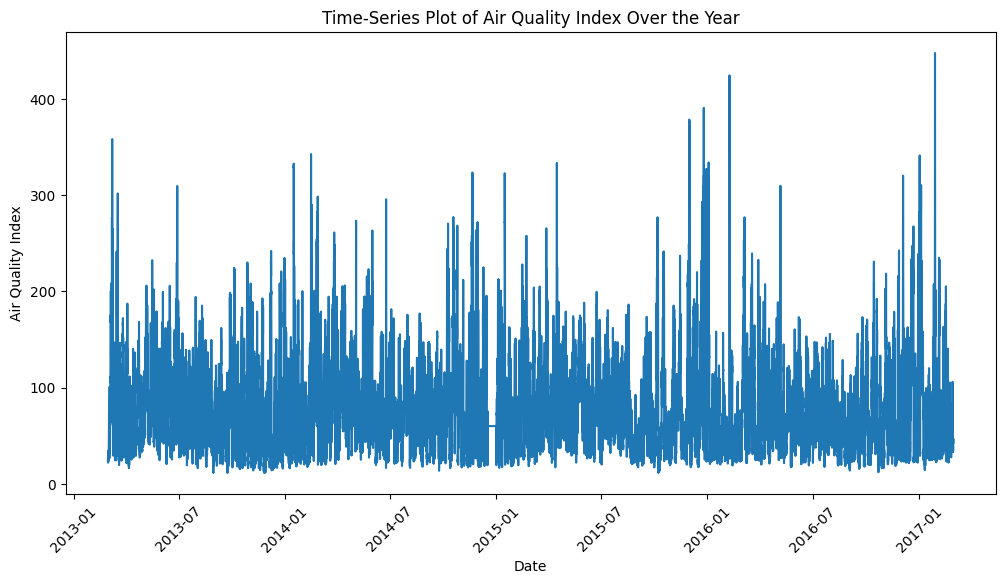

In [91]:
df['date']=pd.to_datetime(df[['year','month','day','hour']])
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['air_quality_index'])
plt.xlabel("Date")
plt.ylabel("Air Quality Index")
plt.title("Time-Series Plot of Air Quality Index Over the Year")
plt.xticks(rotation=45)
plt.show()

2. Pollutant Comparison:

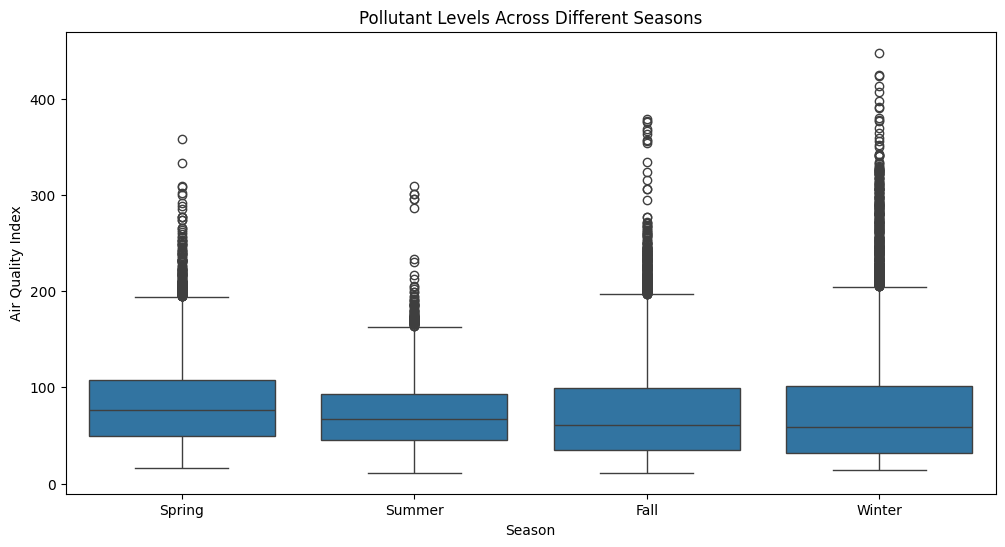

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['season'], y=df['air_quality_index'])
plt.xlabel("Season")
plt.ylabel("Air Quality Index")
plt.title("Pollutant Levels Across Different Seasons")
plt.show()

3. Weather Impact on Air Quality:

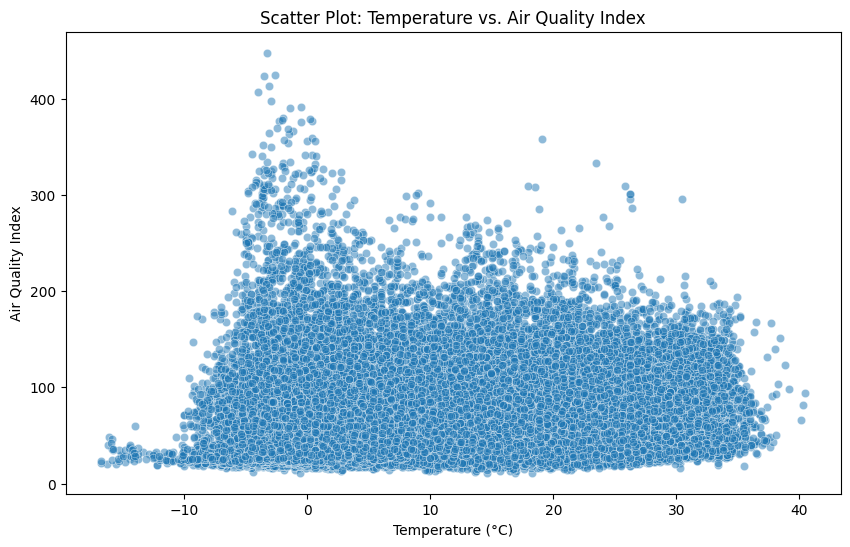

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TEMP'], y=df['air_quality_index'], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Quality Index")
plt.title("Scatter Plot: Temperature vs. Air Quality Index")
plt.show()

4. Pollution Level Analysis:

<ipython-input-94-b1f22de95550>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pollution_level'], palette="coolwarm")


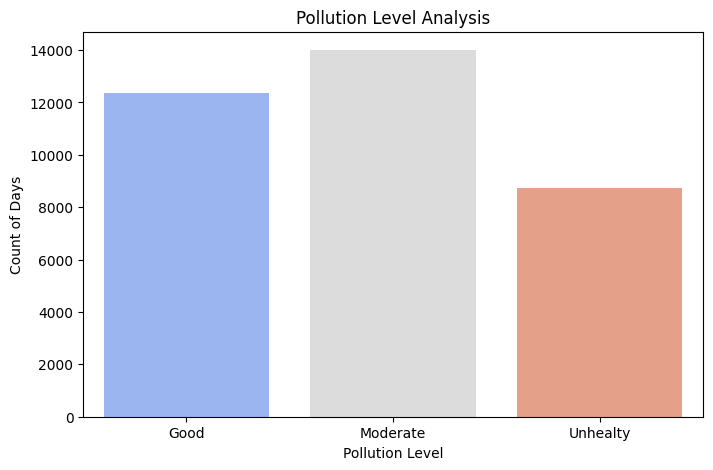

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['pollution_level'], palette="coolwarm")
plt.xlabel("Pollution Level")
plt.ylabel("Count of Days")
plt.title("Pollution Level Analysis")
plt.show()

5. Monthly Air Quality Patterns:

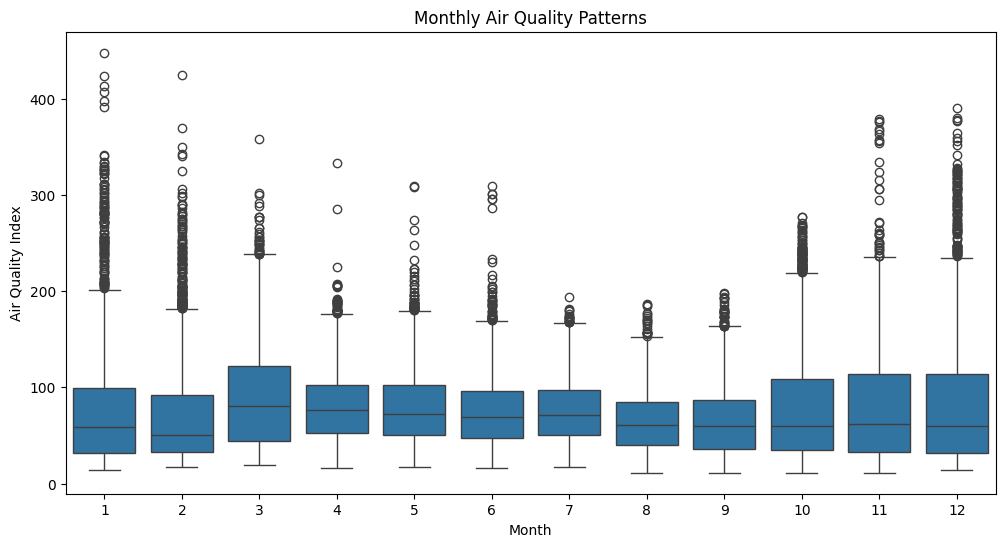

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'], y=df['air_quality_index'])
plt.xlabel("Month")
plt.ylabel("Air Quality Index")
plt.title("Monthly Air Quality Patterns")
plt.show()



---

